- This case is about a bank (Thera Bank) whose management wants to explore ways of converting
its liability customers to personal loan customers (while retaining them as depositors). 
- A campaign that the bank ran last year for liability customers showed a healthy conversion rate of
over 9% success. 
- This has encouraged the retail marketing department to devise campaigns
with better target marketing to increase the success ratio with a minimal budget.

# 1. Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation

In [179]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [180]:
data = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [181]:
data.shape

(5000, 14)

In [182]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [183]:
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [184]:
data.isnull().values.any()

False

In [185]:
data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [186]:
print("Number of customers with less than 0 years experience = {0}".format(data[data['Experience'] < 0].shape[0]))
print("Average experience for those with > 0 years experience = {0}".format(round(data[data['Experience'] >= 0]['Experience'].mean())))

Number of customers with less than 0 years experience = 52
Average experience for those with > 0 years experience = 20


In [187]:
# Impute less than 0 years Experience with 0

data['Experience'] = data['Experience'].replace([-3,-2,-1], 0)
data[data['Experience'] < 0].shape[0]

0

# 2. EDA: Study the data distribution in each attribute and target variable

###### - Create two dataframes for model: y - dependant attribute; X1 - independent attributes
###### - Get data model ready

In [188]:
y = data['Personal Loan']
X1 = data.drop(['ID','Personal Loan','ZIP Code'], axis=1, inplace=False)
X1.describe()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.119600,73.774200,2.396400,1.937938,1.881000,56.498800,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.440484,46.033729,1.147663,1.747659,0.839869,101.713802,0.305809,0.23825,0.490589,0.455637
min,23.000000,0.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.00000,1.000000,1.000000


###### Unique values in each column

In [189]:
for i in list(X1.columns[:]):
    num_unique = X1[i].unique().shape[0]
    if num_unique <= 5:
        print("{0} unique values count = {1}: {2}".format(i, X1[i].unique().shape[0], X1[i].unique()))
    else:
        print("{0} unique values count = {1}".format(i, X1[i].unique().shape[0]))
    print()

Age unique values count = 45

Experience unique values count = 44

Income unique values count = 162

Family unique values count = 4: [4 3 1 2]

CCAvg unique values count = 108

Education unique values count = 3: [1 2 3]

Mortgage unique values count = 347

Securities Account unique values count = 2: [1 0]

CD Account unique values count = 2: [0 1]

Online unique values count = 2: [0 1]

CreditCard unique values count = 2: [0 1]



###### Number of people with zero mortgage

In [190]:
print("Number of people with zero mortgage = {0}".format(X1[X1['Mortgage'] == 0].shape[0]))

Number of people with zero mortgage = 3462


###### Number of people with zero zero credit card spending per month

In [191]:
print("Number of people with zero credit card spending per month = {0}".format(X1[X1['CCAvg'] == 0].shape[0]))

Number of people with zero credit card spending per month = 106


###### Value counts in each categorical column

In [192]:
y.value_counts(ascending=False, normalize=True).to_frame()

,Personal Loan
0,0.904
1,0.096


In [193]:
for i in ['Education','Securities Account','CD Account','Online','CreditCard']:
    print(X1[i].value_counts(ascending=False, normalize=True))
    print()

1    0.4192
3    0.3002
2    0.2806
Name: Education, dtype: float64

0    0.8956
1    0.1044
Name: Securities Account, dtype: float64

0    0.9396
1    0.0604
Name: CD Account, dtype: float64

1    0.5968
0    0.4032
Name: Online, dtype: float64

0    0.706
1    0.294
Name: CreditCard, dtype: float64



###### Univariate Data Analysis
- Indeed 9.6 % customers accepted personal loan offered to them by Thera in earlier campaign
- 29.4 % customers have a credit card issued by the bank
- 10.4 % customers have existing Securities Account with the bank
- 6 % customers have existing Certificate of Deposit account with the bank
- More customers use Internet Banking, than those who don't (59.68 % to be specific)
- Spread of Education level is such that more customers have Undergraduate (41.92%), 10% more than Advanced/Professional (30%) and Graduate (Graduate)

###### Bivariate Data

In [194]:
for i in ['Education','Securities Account','CD Account','Online','CreditCard']:
    print(pd.crosstab(data['Personal Loan'], data[i],normalize='columns'))
    print()

Education            1         2         3
Personal Loan                             
0              0.95563  0.870278  0.863424
1              0.04437  0.129722  0.136576

Securities Account         0         1
Personal Loan                         
0                   0.906208  0.885057
1                   0.093792  0.114943

CD Account            0         1
Personal Loan                    
0              0.927629  0.536424
1              0.072371  0.463576

Online               0        1
Personal Loan                  
0              0.90625  0.90248
1              0.09375  0.09752

CreditCard            0         1
Personal Loan                    
0              0.904533  0.902721
1              0.095467  0.097279



###### Bivariate Data Analysis
- Education: Graduate (12.9%) and Advanced/Professional (13.65%) customers accept Personal Loans in their category as compared to Undergraduates (4.4%)
- Securities Account: Customers with this account type are more likely to accept a Personal Loan (11.5% compared to 9.3% without this account)
- CD Account: Customers with this account type are more likely to accept a Personal Loan (46.3% compared to 7.2% without this account)
- Internet Banking: Customers are equally likely to accept Personal Loan whther or not they use online internet banking services
- Credit Card: Customers are equally likely to accept Personal Loan whether or not they have a credit card from the bank

# 3. Split the data into training and test set in the ratio of 70:30 respectively

In [195]:
X1 = pd.get_dummies(X1, columns=['Education'], drop_first=True)

In [196]:
from sklearn.model_selection import train_test_split

X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.3, random_state=3)
X1_train.head()

,Age,Experience,Income,Family,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Education_2,Education_3
1526,36,10,80,4,2.2,0,0,0,1,0,1,0
499,50,25,42,3,1.7,0,0,0,1,0,1,0
2778,56,31,61,4,1.3,0,0,0,1,1,0,1
942,55,29,30,4,0.7,0,0,0,0,1,1,0
2393,53,28,14,4,0.8,0,0,0,1,1,0,0


# 4. Use Logistic Regression model to predict whether the customer will take personal loan or not

###### Logit Creation

In [197]:
import statsmodels.api as sm

logit=sm.Logit(y_train, sm.add_constant(X1_train))
logit_fit=logit.fit()
logit_fit.summary()

Optimization terminated successfully.
         Current function value: 0.106548
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3487
Method:                           MLE   Df Model:                           12
Date:                Thu, 05 Nov 2020   Pseudo R-squ.:                  0.6582
Time:                        16:01:31   Log-Likelihood:                -372.92
converged:                       True   LL-Null:                       -1090.9
Covariance Type:            nonrobust   LLR p-value:                2.363e-300
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -13.6134      2.342     -5.813      0.000     -18.204      -9.023
Age                   -0.0488      0.085     -0.571      0.568      -0.216       0.119
Experience             0.0614      0.085      0.723      0.470      -0.105       0.228
Income                 0.0677      0.004     16.744      0.000       0.060       0.076
Family                 0.6383      0.096      6.626      0.000       0.450       0.827
CCAvg                  0.1933      0.055      3.519      0.000       0.086       0.301
Mortgage               0.0008      0.001      1.080      0.280      -0.001       0.002
Securities Account    -0.9437      0.384     -2.455      0.014      -1.697      -0.190
CD Account             4.3320      0.433     10.016      0.000       3.484       5.180
Online                -0.7467      0.209     -3.573      0.000      -1.156      -0.337
CreditCard            -1.0929      0.268     -4.084      0.000      -1.617      -0.568
Education_2            4.8303      0.371     13.027      0.000       4.104       5.557
Education_3            4.6632      0.359     12.997      0.000       3.960       5.366
======================================================================================

Possibly complete quasi-separation: A fraction 0.16 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

###### Predictions

In [198]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000,random_state=7)
logreg.fit(X1_train, y_train)

LogisticRegression(max_iter=1000, random_state=7)

In [199]:
y_predict = logreg.predict(X1_test)    
y_predict # Predicting the target variable on test data

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [200]:
y_pred_prob = logreg.predict_proba(X1_test)   
y_pred_prob[:,1]

array([4.72248129e-01, 7.99698747e-03, 3.63231046e-04, ...,
       7.87429776e-02, 3.59547466e-02, 9.13340167e-04])

In [201]:
# Add Predicted vs observed to DataFrame and compare

check = X1_test.copy()
check['Observed_Loan_Status'] = y_test
check['Predicted_Loan_Status'] = y_predict
check.head()

,Age,Experience,Income,Family,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Education_2,Education_3,Observed_Loan_Status,Predicted_Loan_Status
2584,59,34,114,3,4.2,0,0,0,1,0,1,0,1,0
4338,54,30,121,2,0.4,0,0,0,1,0,0,0,0,0
4556,55,29,79,2,1.1,0,1,0,1,0,0,0,0,0
3438,43,17,72,1,2.8,271,0,0,1,0,0,0,0,0
737,64,37,138,2,2.8,0,0,0,1,0,1,0,1,1


###### Confusion Matrix

In [202]:
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.0f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

Confusion Matrix Output


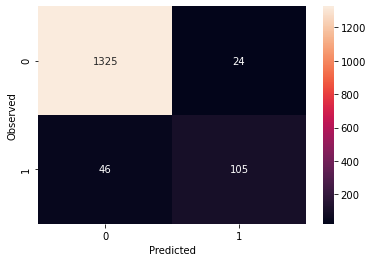

In [203]:
print('Confusion Matrix Output')
draw_cm(y_test,y_predict)
print()

###### Init_Model: Recall, Precision, F1 Score & ROC AUC Score

In [204]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1349
           1       0.81      0.70      0.75       151

    accuracy                           0.95      1500
   macro avg       0.89      0.84      0.86      1500
weighted avg       0.95      0.95      0.95      1500



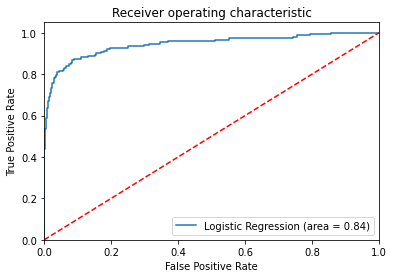

In [205]:
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X1_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X1_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

1. Recall/Sensitivity for Init_Model is 0.71
2. Precision/Specificity for Init_Model is 0.82
3. F1 Score for Init_Model is 0.76
4. AUC for Init_Model is 0.84

# 5. Check different parameters of Logistic Regression and give your reasoning whether the model performance is affected due to it or not

###### Drop attributes that don't add value to prediction
 - Init_Model in step 4 above shows that Age, Experience & the value of an existing Mortgage do not affect the chances of a customer accepting a Personal Loan, per their z score being less that 2 standard deviations from the mean & their P>|z| > 0.05

In [206]:
X2 = X1.drop(['Age','Experience','Mortgage'], axis=1, inplace=False)
X2.head()

,Income,Family,CCAvg,Securities Account,CD Account,Online,CreditCard,Education_2,Education_3
0,49,4,1.6,1,0,0,0,0,0
1,34,3,1.5,1,0,0,0,0,0
2,11,1,1.0,0,0,0,0,0,0
3,100,1,2.7,0,0,0,0,1,0
4,45,4,1.0,0,0,0,1,1,0


###### New Logit Creation

In [207]:
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.3, random_state=3)
logit2=sm.Logit(y_train, sm.add_constant(X2_train))
logit_fit2=logit2.fit()
logit_fit2.summary()

Optimization terminated successfully.
         Current function value: 0.107105
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3490
Method:                           MLE   Df Model:                            9
Date:                Thu, 05 Nov 2020   Pseudo R-squ.:                  0.6564
Time:                        16:01:33   Log-Likelihood:                -374.87
converged:                       True   LL-Null:                       -1090.9
Covariance Type:            nonrobust   LLR p-value:                8.787e-303
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -14.4745      0.792    -18.280      0.000     -16.026     -12.922
Income                 0.0678      0.004     16.952      0.000       0.060       0.076
Family                 0.6380      0.096      6.637      0.000       0.450       0.826
CCAvg                  0.1780      0.054      3.283      0.001       0.072       0.284
Securities Account    -0.9099      0.382     -2.385      0.017      -1.658      -0.162
CD Account             4.3433      0.431     10.086      0.000       3.499       5.187
Online                -0.7379      0.208     -3.540      0.000      -1.146      -0.329
CreditCard            -1.0794      0.266     -4.057      0.000      -1.601      -0.558
Education_2            4.7675      0.367     13.000      0.000       4.049       5.486
Education_3            4.5859      0.353     13.005      0.000       3.895       5.277
======================================================================================

Possibly complete quasi-separation: A fraction 0.16 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

###### New Predictions

In [208]:
logreg = LogisticRegression(max_iter=1000,random_state=7)
logreg.fit(X2_train, y_train)

LogisticRegression(max_iter=1000, random_state=7)

In [209]:
y_predict = logreg.predict(X2_test)    
y_predict # Predicting the target variable on test data

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [210]:
y_pred_prob = logreg.predict_proba(X2_test)   
y_pred_prob[:,1]

array([4.33277668e-01, 7.43448163e-03, 3.63300673e-04, ...,
       5.40019903e-02, 3.28383889e-02, 9.99635260e-04])

In [211]:
# Add Predicted vs observed to DataFrame and compare

check = X2_test.copy()
check['Observed_Loan_Status'] = y_test
check['Predicted_Loan_Status'] = y_predict
check.head()

,Income,Family,CCAvg,Securities Account,CD Account,Online,CreditCard,Education_2,Education_3,Observed_Loan_Status,Predicted_Loan_Status
2584,114,3,4.2,0,0,1,0,1,0,1,0
4338,121,2,0.4,0,0,1,0,0,0,0,0
4556,79,2,1.1,1,0,1,0,0,0,0,0
3438,72,1,2.8,0,0,1,0,0,0,0,0
737,138,2,2.8,0,0,1,0,1,0,1,1


###### New Confusion Matrix

In [212]:
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.0f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

Confusion Matrix Output


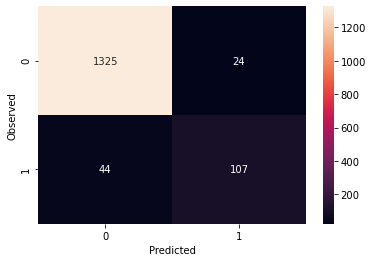

In [213]:
print('Confusion Matrix Output')
draw_cm(y_test,y_predict)
print()

###### Evolved_Model: Recall, Precision, F1 Score & ROC AUC Score

In [214]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1349
           1       0.82      0.71      0.76       151

    accuracy                           0.95      1500
   macro avg       0.89      0.85      0.87      1500
weighted avg       0.95      0.95      0.95      1500



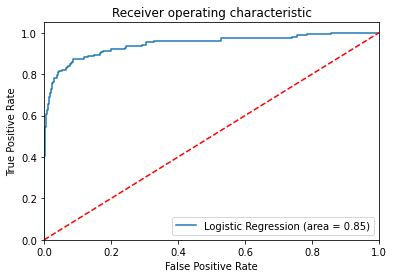

In [215]:
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X2_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X2_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

1. Recall/Sensitivity for Evolved_Model is 0.71, same as Init_Model
2. Precision/Specificity for Evolved_Model is 0.82, same as Init_Model
3. F1 Score for Evolved_Model is 0.76, same as Init_Model
4. AUC for Evolved_Model is 0.85, compared to 0.84 of Init_Model, indicating Evolved_Model is better than Init_Model

# 6. Give Business understanding of your model

1. Having a Securities Account reduces the chances of a customer accepting a Personal Loan, per its co-efficient in the Logit Regression Results
2. Use of Internet Banking reduces the chances of a customer accepting a Personal Loan, per its co-efficient in the Logit Regression Results
3. Having a Credit Card issued by the bank reduces the chances of a customer accepting a Personal Loan, per its co-efficient in the Logit Regression Results
4. AUC improved in the Evolved_Model where Age, Experience & the value of an existing Mortgage are not taken into consideration
5. Education, CD Account & Family size are the top 3 features which influence the model's output, per their co-efficients in the Logit Regression Results
6. Both Evolved_Model and Init_Model, show an accuracy of 76% (F1 Score of 0.76). It would be good to know active usage of banking offerings (as binary input or Active/InActive) in a defined historical period, to see if it may impact acceptance of personal loans. The current data does not provide this information